In [55]:
# libraries
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from glob import glob

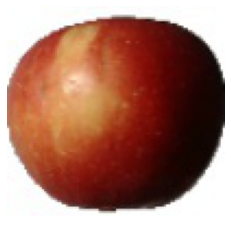

In [56]:
train_path = r"******your training path ******"
test_path = r"*******your   test   path *******"

img = load_img(train_path + "Apple Braeburn/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [57]:
x = img_to_array(img)
print(x.shape)

className = glob(train_path + '/*' )
numberOfClass = len(className)
print("NumberOfClass: ",numberOfClass)

(100, 100, 3)
NumberOfClass:  131


In [58]:
# CNN Model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])
batch_size = 32

In [59]:
# Data Generation - Train - Test
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size=x.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size=x.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [60]:
hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = 1600 // batch_size,
        epochs=100,
        validation_data = test_generator,
        validation_steps = 800 // batch_size)

Epoch 1/100
50/50 [==============================] - 70s 1s/step - loss: 4.7537 - accuracy: 0.0323 - val_loss: 4.2478 - val_accuracy: 0.0825
Epoch 2/100
50/50 [==============================] - 55s 1s/step - loss: 3.8587 - accuracy: 0.1106 - val_loss: 4.3995 - val_accuracy: 0.0950
Epoch 3/100
50/50 [==============================] - 50s 1s/step - loss: 2.9959 - accuracy: 0.2175 - val_loss: 2.3814 - val_accuracy: 0.3938
Epoch 4/100
50/50 [==============================] - 52s 1s/step - loss: 2.4489 - accuracy: 0.3212 - val_loss: 1.6976 - val_accuracy: 0.4913
Epoch 5/100
50/50 [==============================] - 53s 1s/step - loss: 2.0387 - accuracy: 0.4087 - val_loss: 1.1469 - val_accuracy: 0.6375
Epoch 6/100
50/50 [==============================] - 55s 1s/step - loss: 1.8062 - accuracy: 0.4663 - val_loss: 2.2743 - val_accuracy: 0.4988
Epoch 7/100
50/50 [==============================] - 61s 1s/step - loss: 1.5270 - accuracy: 0.5350 - val_loss: 0.9425 - val_accuracy: 0.7063
Epoch 8/100
5

Epoch 58/100
50/50 [==============================] - 22s 438ms/step - loss: 0.1515 - accuracy: 0.9519 - val_loss: 0.1106 - val_accuracy: 0.9525
Epoch 59/100
50/50 [==============================] - 21s 422ms/step - loss: 0.2285 - accuracy: 0.9369 - val_loss: 0.0720 - val_accuracy: 0.9588
Epoch 60/100
50/50 [==============================] - 22s 433ms/step - loss: 0.1841 - accuracy: 0.9481 - val_loss: 0.2787 - val_accuracy: 0.9650
Epoch 61/100
50/50 [==============================] - 22s 431ms/step - loss: 0.1794 - accuracy: 0.9444 - val_loss: 0.3538 - val_accuracy: 0.9000
Epoch 62/100
50/50 [==============================] - 22s 435ms/step - loss: 0.1850 - accuracy: 0.9444 - val_loss: 0.1817 - val_accuracy: 0.9513
Epoch 63/100
50/50 [==============================] - 22s 446ms/step - loss: 0.2046 - accuracy: 0.9394 - val_loss: 0.0078 - val_accuracy: 0.9563
Epoch 64/100
50/50 [==============================] - 21s 424ms/step - loss: 0.1629 - accuracy: 0.9475 - val_loss: 2.2447 - val_ac

In [61]:
# model save
model.save("fruit.h5")

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


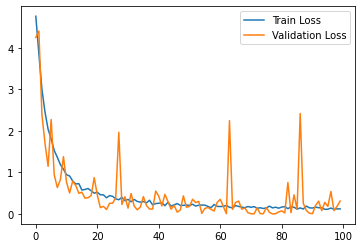

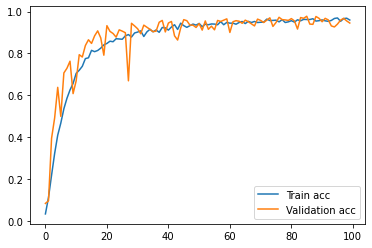

In [63]:
# model evaluation
print(hist.history.keys())
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

In [79]:
# example of converting an image with the Keras API
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.models import load_model


model = load_model("fruit.h5")

# load the image
img = load_img('10_100.jpg')# , grayscale=False, target_size = (100,100)) if we want, add different parameters
print("Orignal image type:" ,type(img))
img.show()
# convert to numpy array
img_array = img_to_array(img)
print("original is converted to " + str(type(img_array))) 
print("type:",img_array.dtype)
print("shape:",img_array.shape)

# convert back to image
img_pil = array_to_img(img_array)
print("converting NumPy array to :",type(img_pil))


img_array = np.reshape(img_array,[1,100,100,3])

cl = model.predict(img_array)
classes = np.argmax(model.predict(img_array), axis = -1)

print(cl)
print(classes)


Orignal image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
original is converted to <class 'numpy.ndarray'>
type: float32
shape: (100, 100, 3)
converting NumPy array to : <class 'PIL.Image.Image'>
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[11]
